# House Prices Prediction

Các bước EDA:

-   Check duplicated value

-   Check missing value
-   Loại bỏ Outliers
-   phân tích SalePrice
-   Phân tích độ tương quan, mối qhe của các đặc trưng
-   Phân tích đơn , đa các đặc trưng tương quan mạnh



Preprocess
-    mising , encode, scaling khi merge train+test

### Import packages

In [2]:
%pip install catboost

import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

from math import sqrt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns', None)


Note: you may need to restart the kernel to use updated packages.


### Load Dataset

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')


#tách saleprice
y = df_train["SalePrice"]
X = df_train.drop("SalePrice", axis=1)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Checking dup

In [4]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(np.int64(0), np.int64(0))

### Outliers 
Kiem tra ngoai le cho cac dac trung truoc khi xu ly du lieu thieu

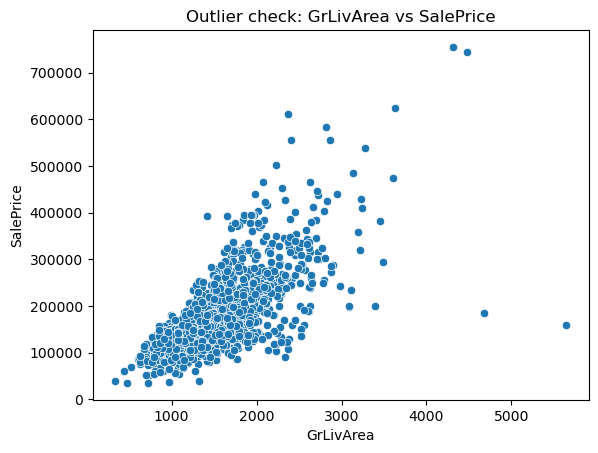

In [5]:
sns.scatterplot(x=df_train["GrLivArea"], y=df_train["SalePrice"])
plt.title("Outlier check: GrLivArea vs SalePrice")
plt.show()


Ta thấy được với GrLivArea > 4000 có các điểm SalePrice thấp bất thường nên cần loại bỏ

In [6]:
df_train = df_train[df_train['GrLivArea'] < 4000]

#### Tìm outliers của các đặc trưng numerical trước khi tới missing value

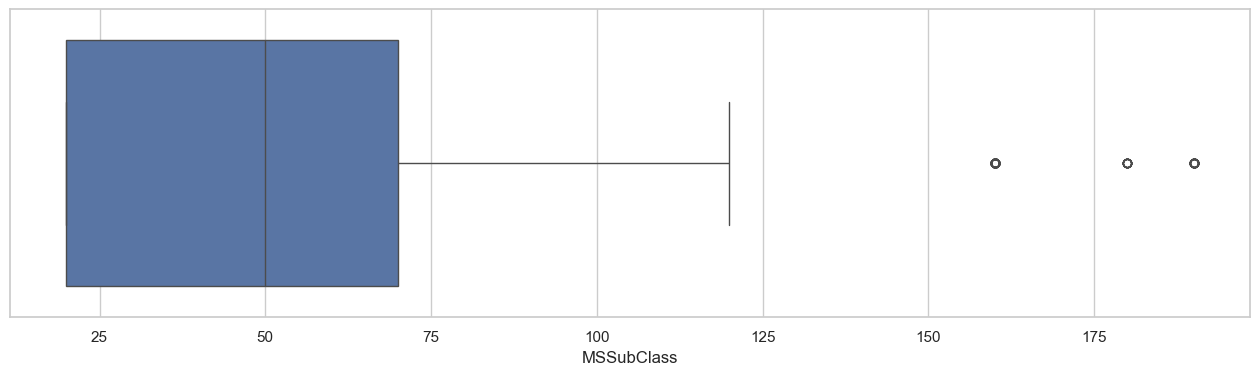

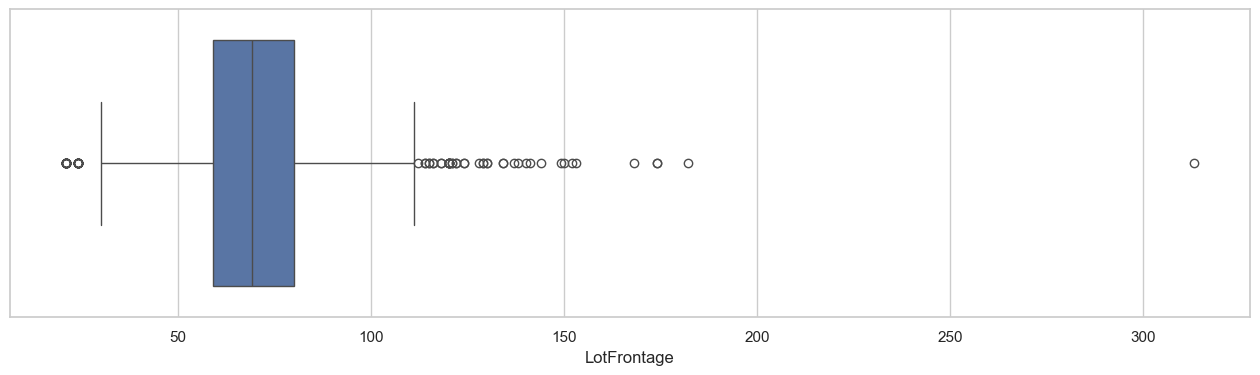

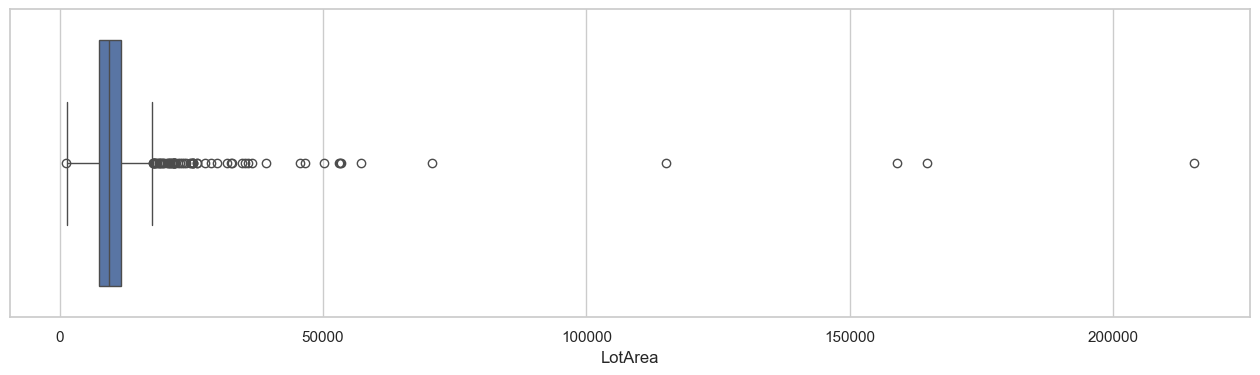

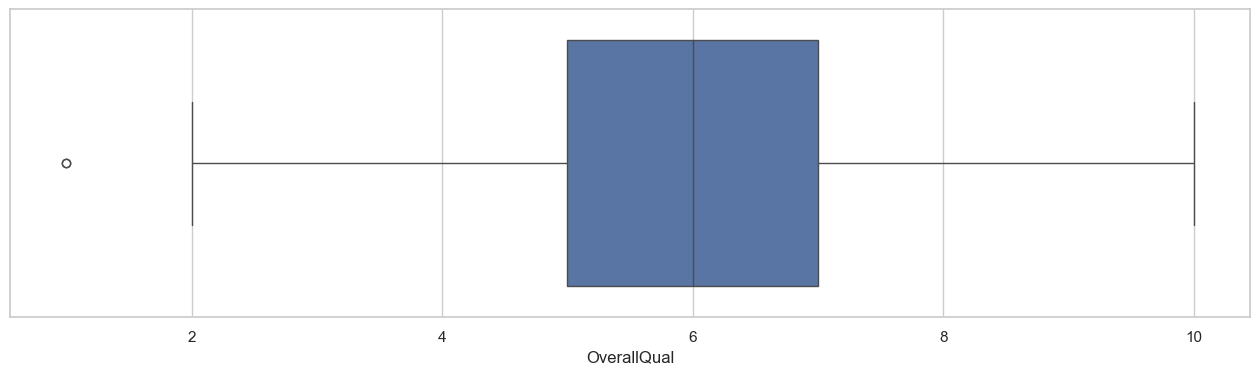

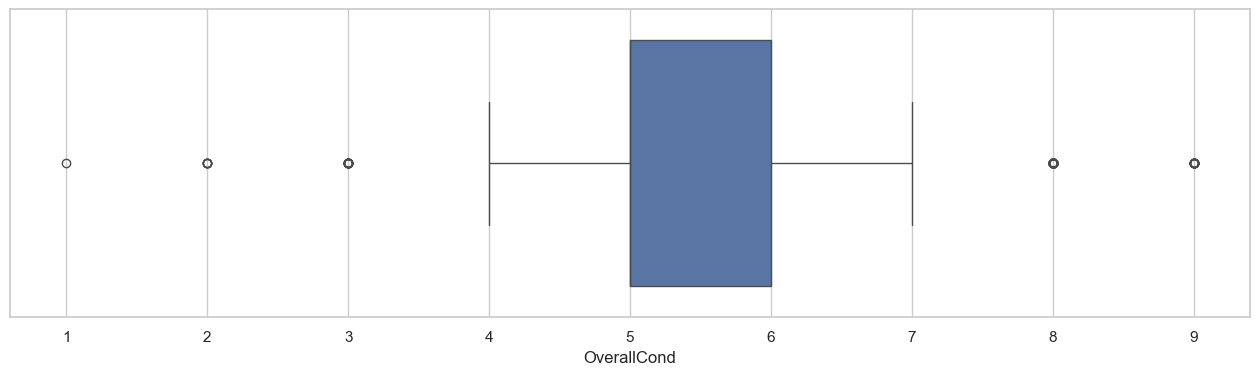

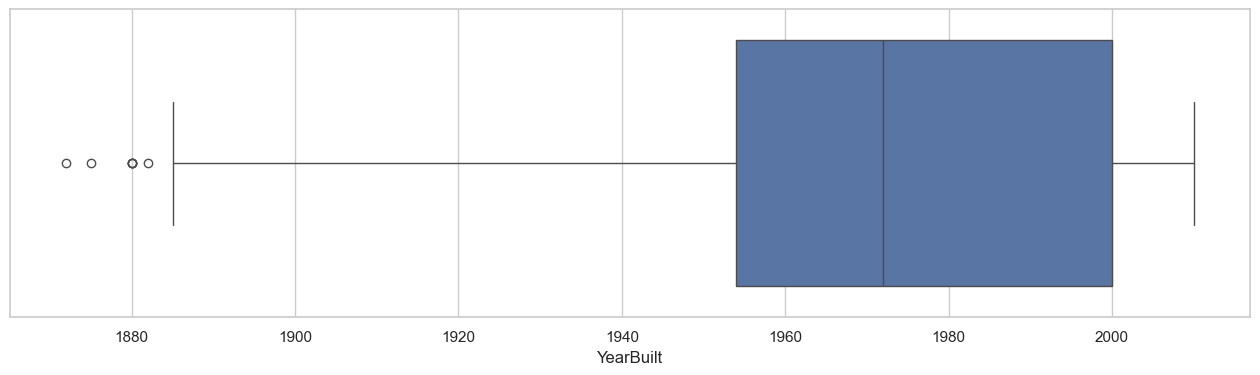

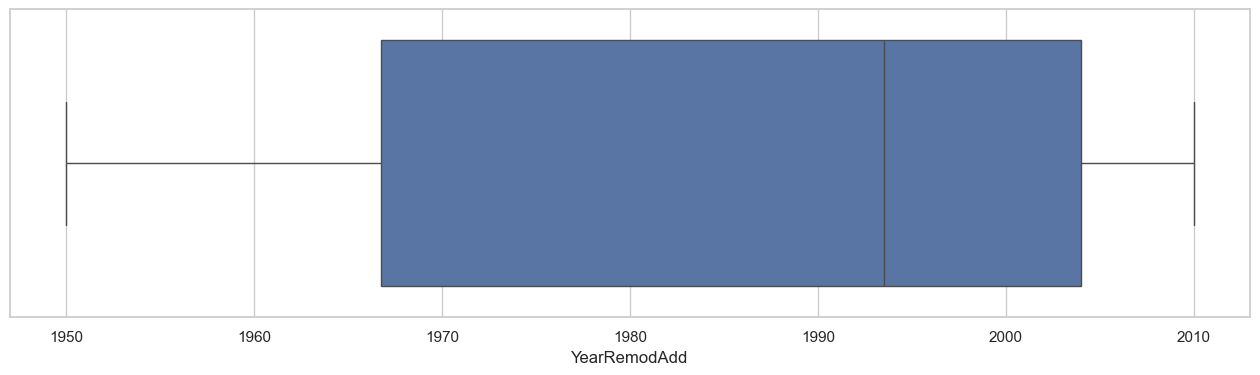

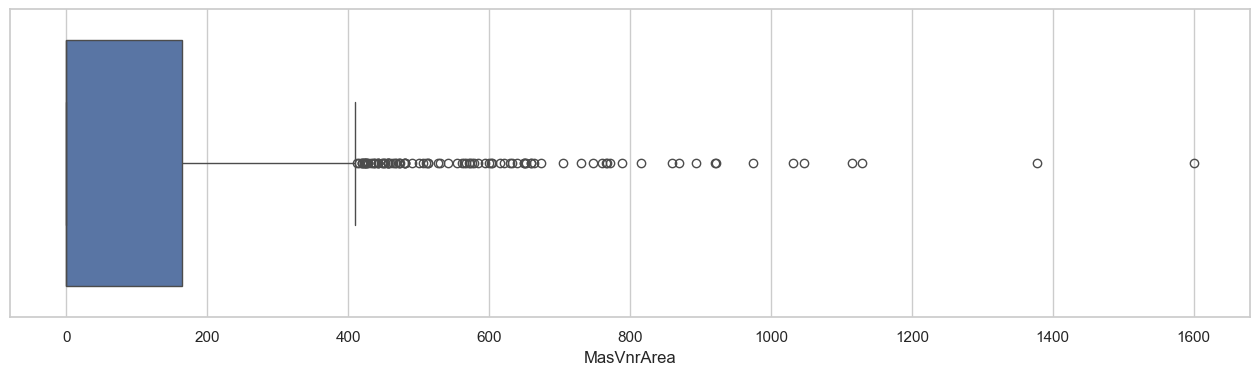

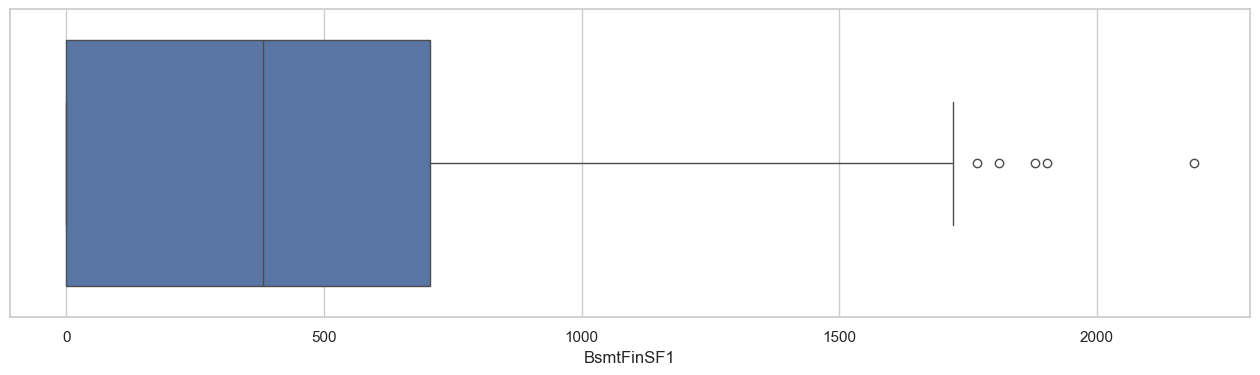

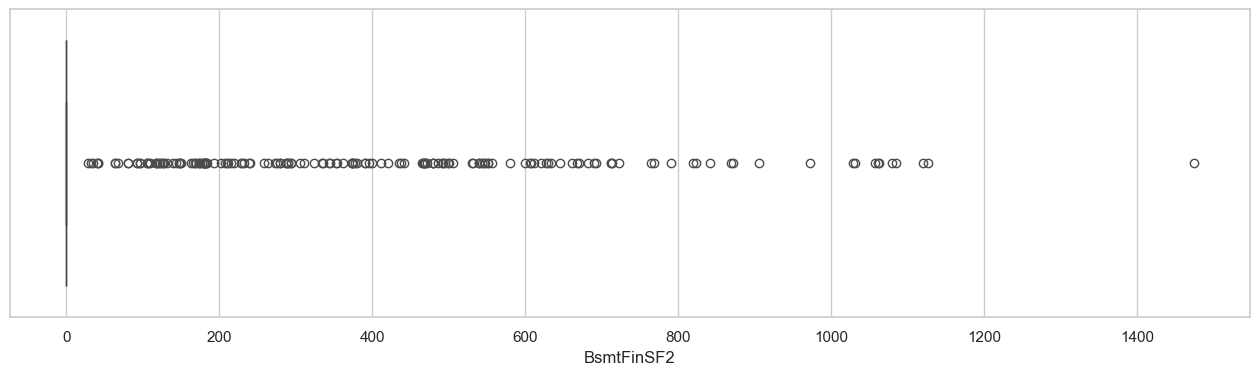

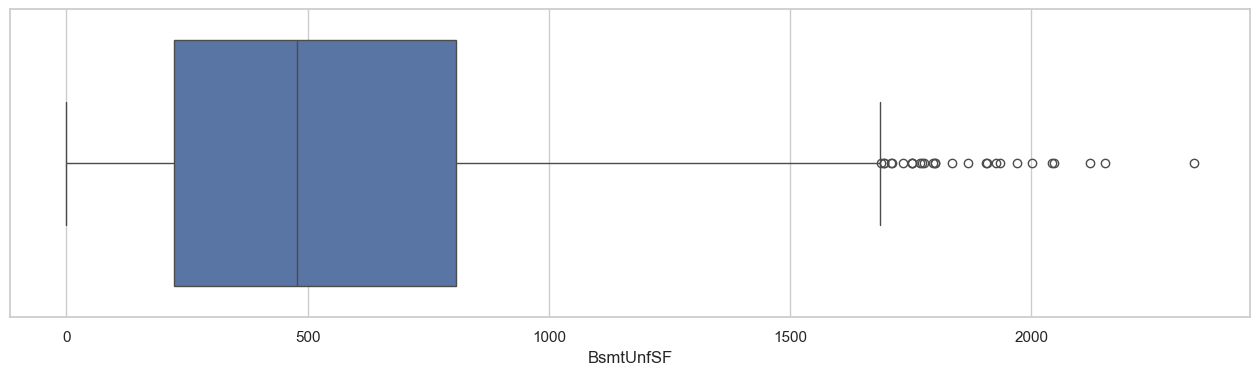

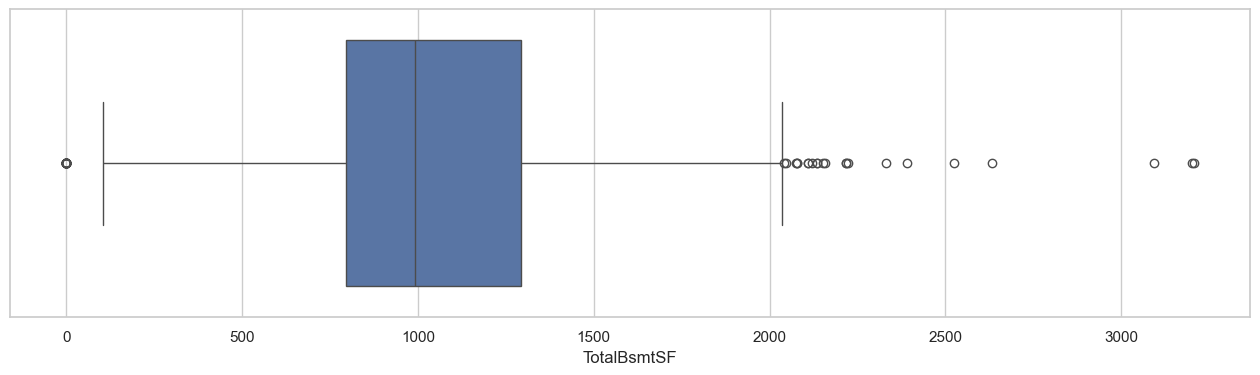

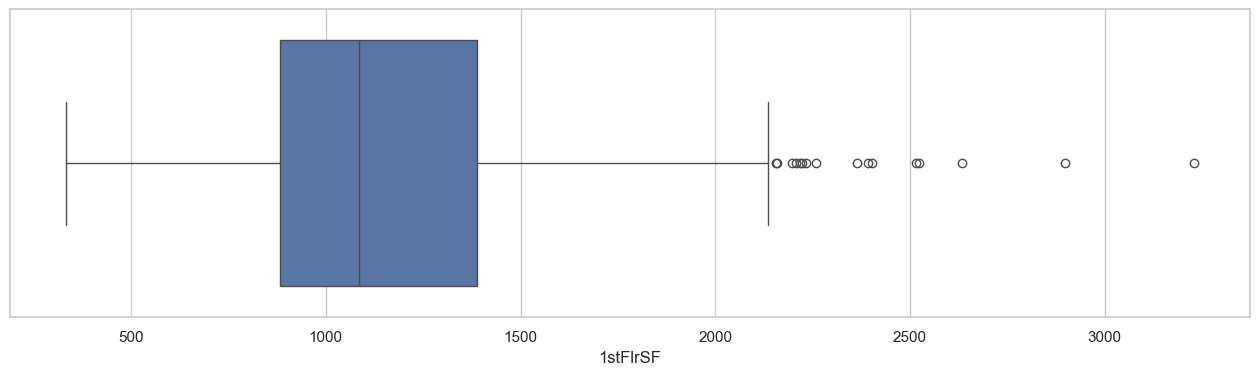

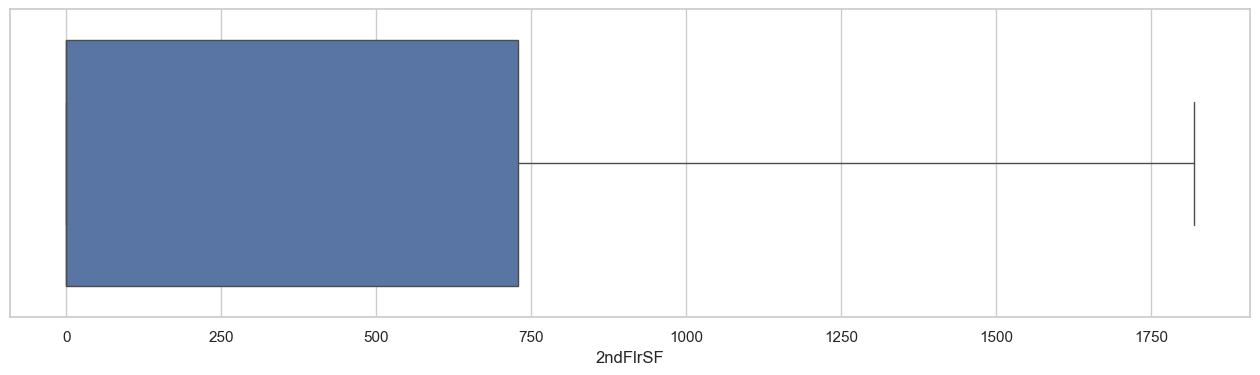

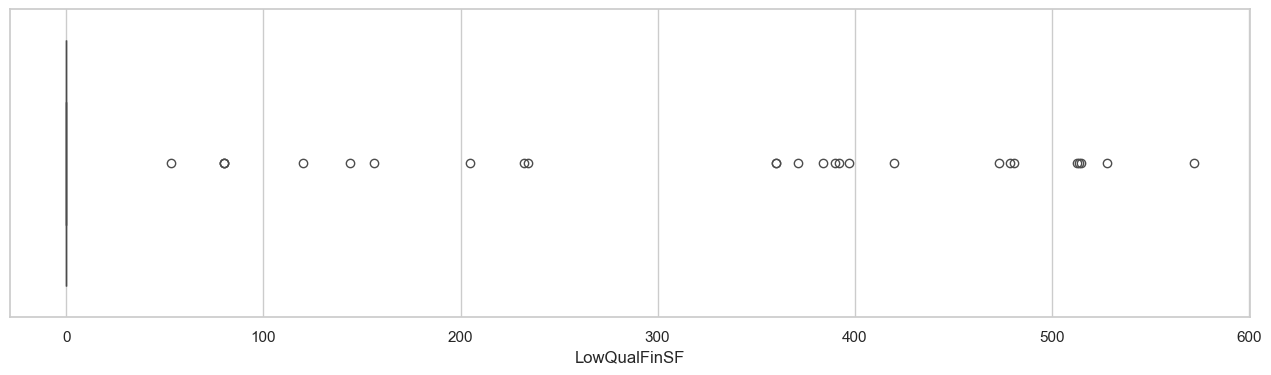

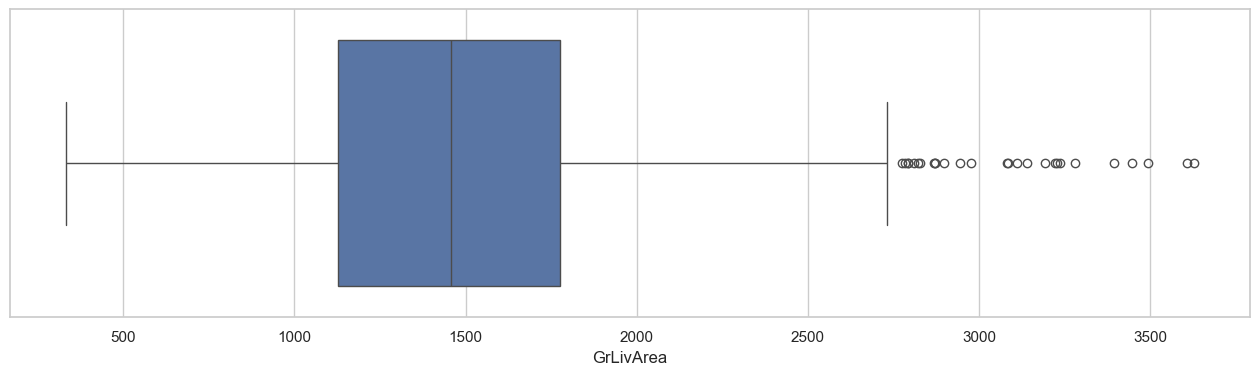

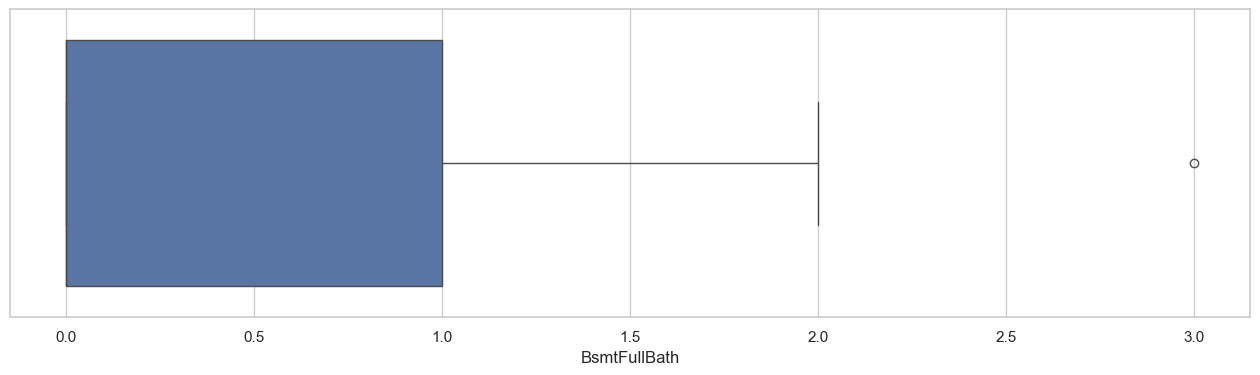

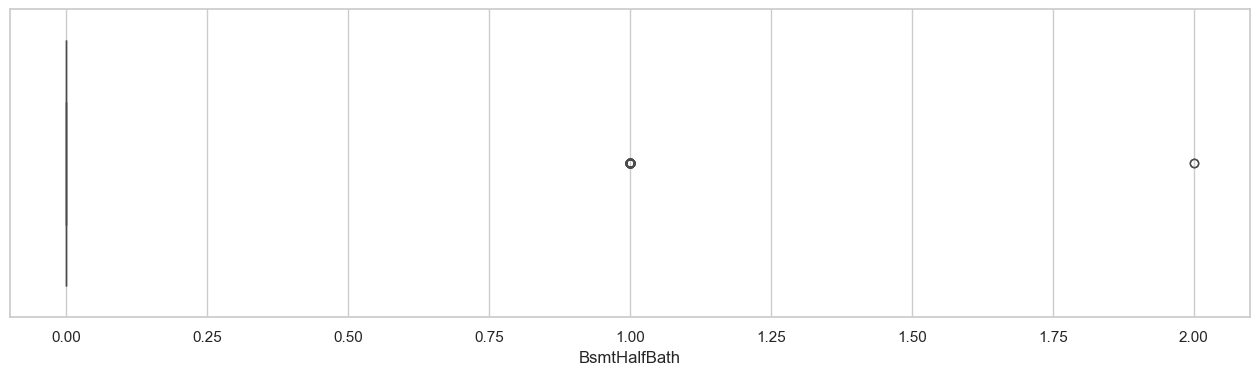

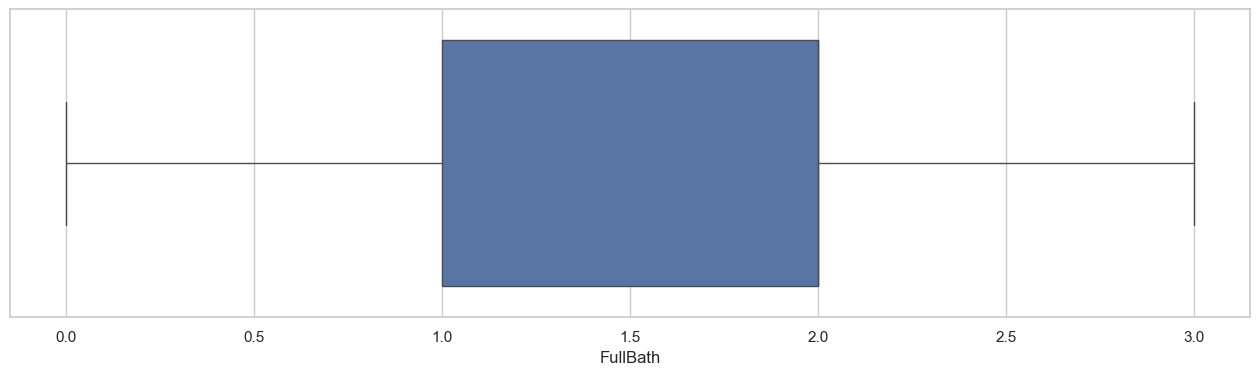

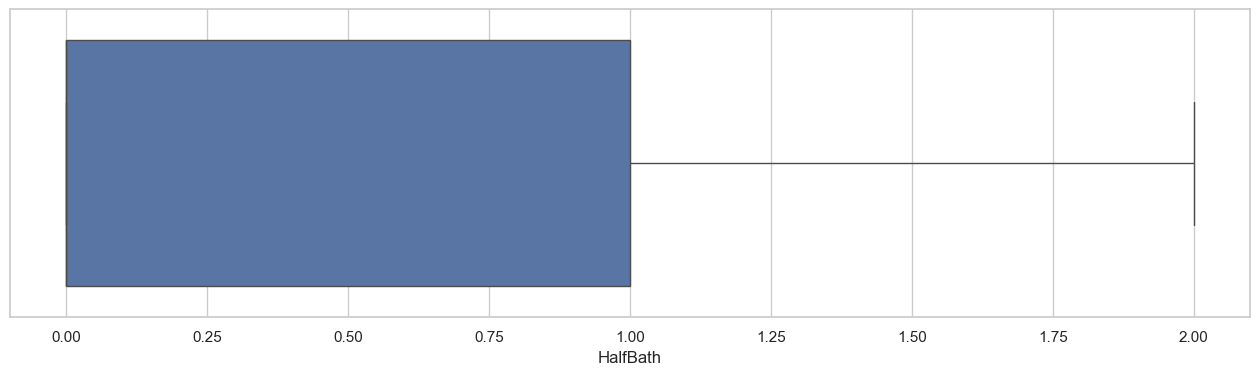

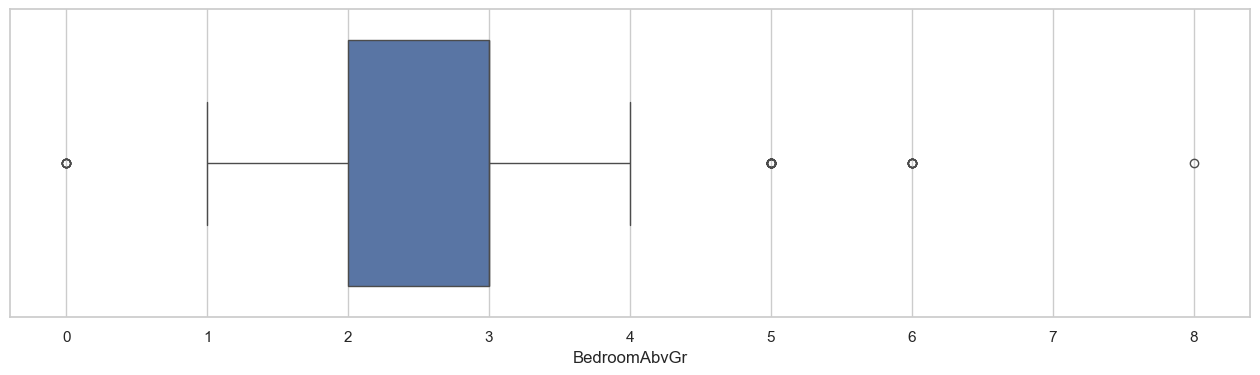

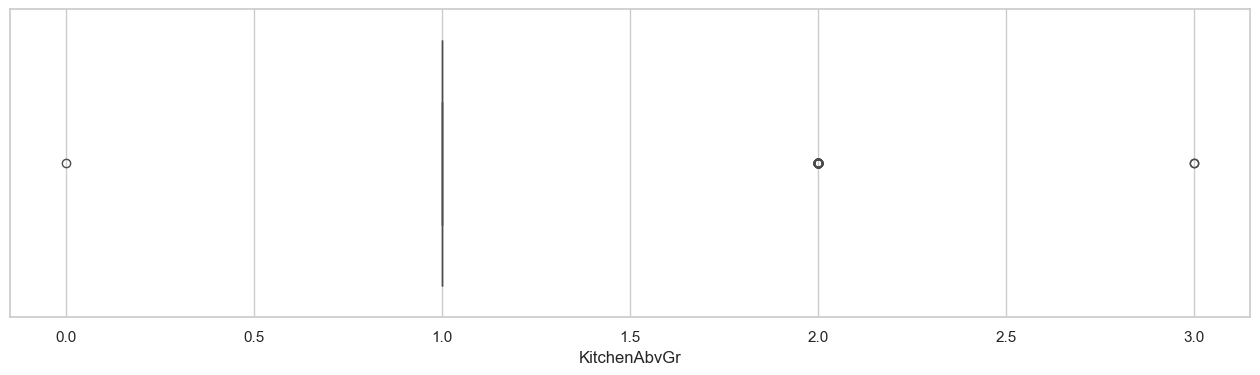

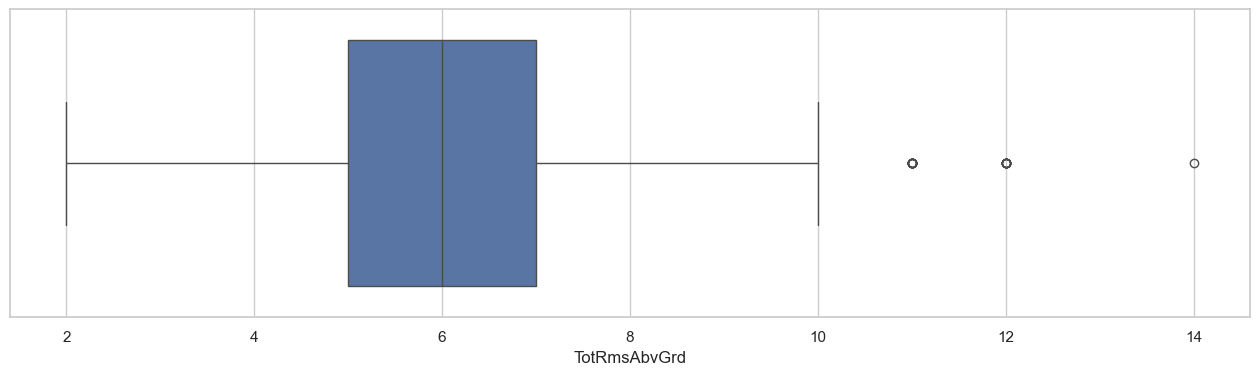

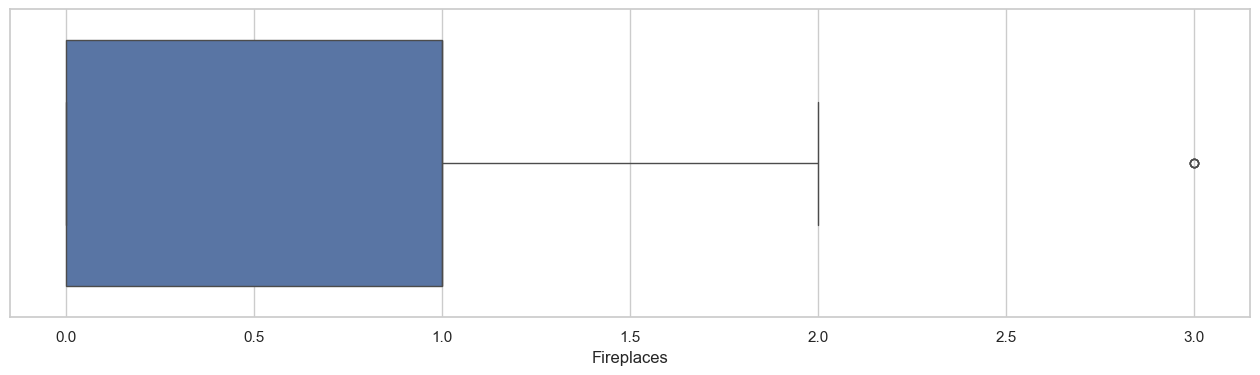

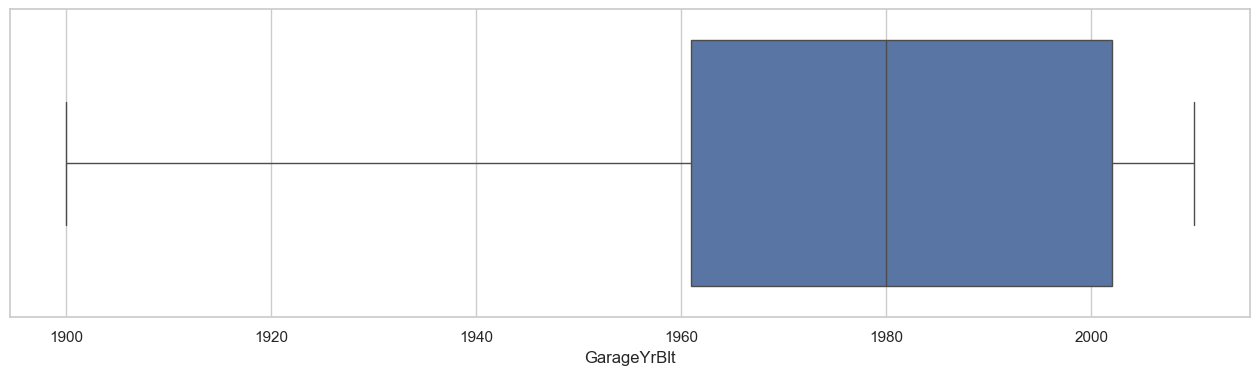

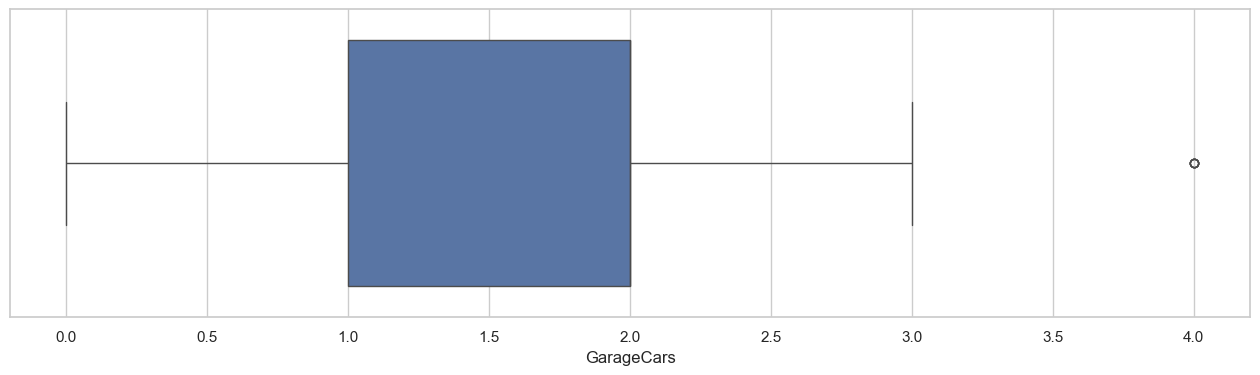

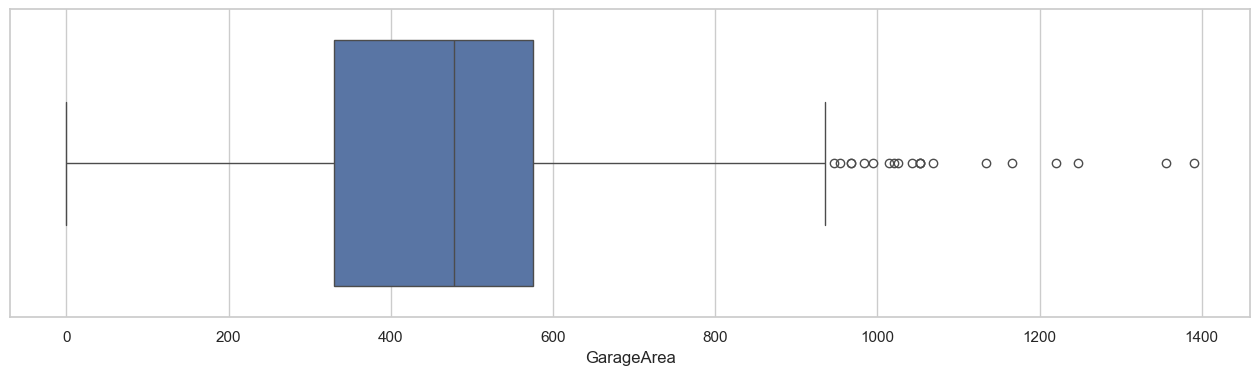

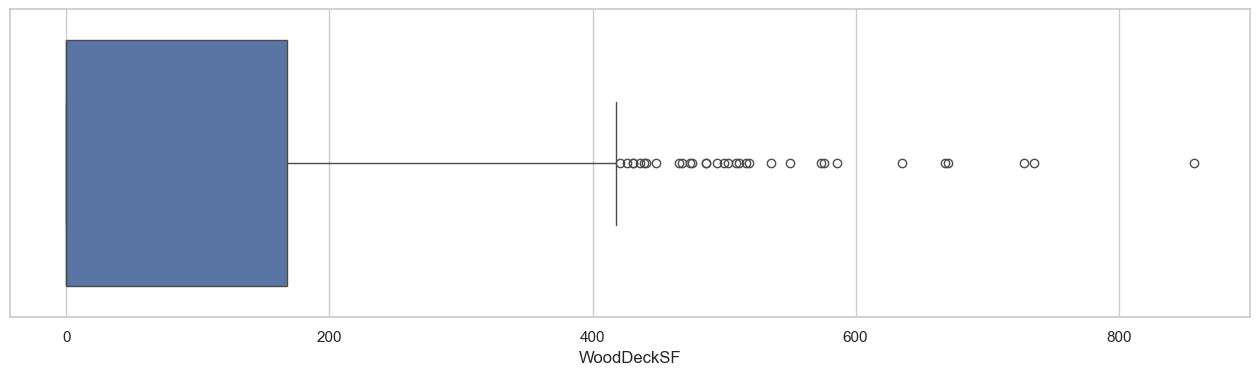

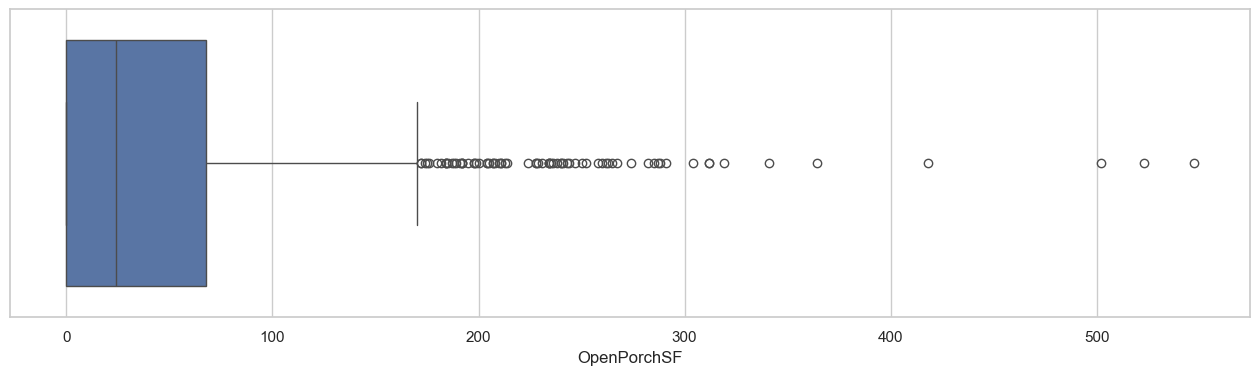

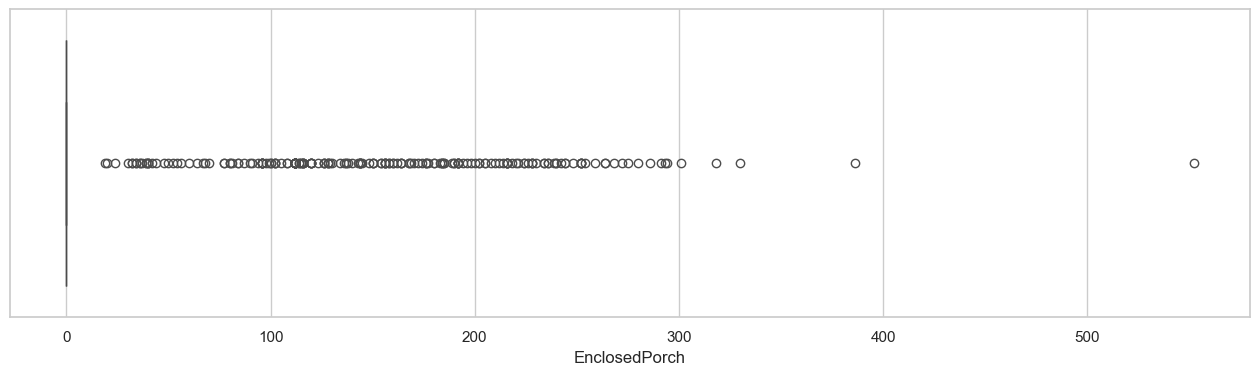

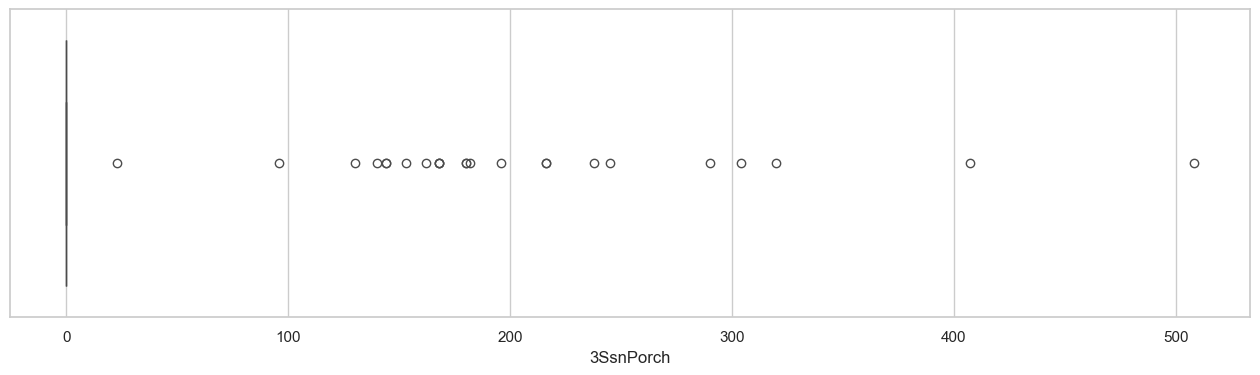

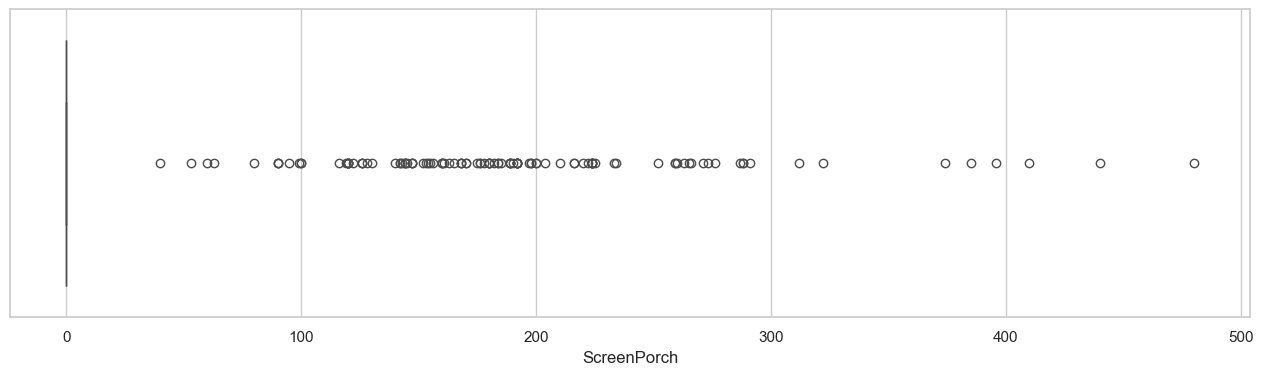

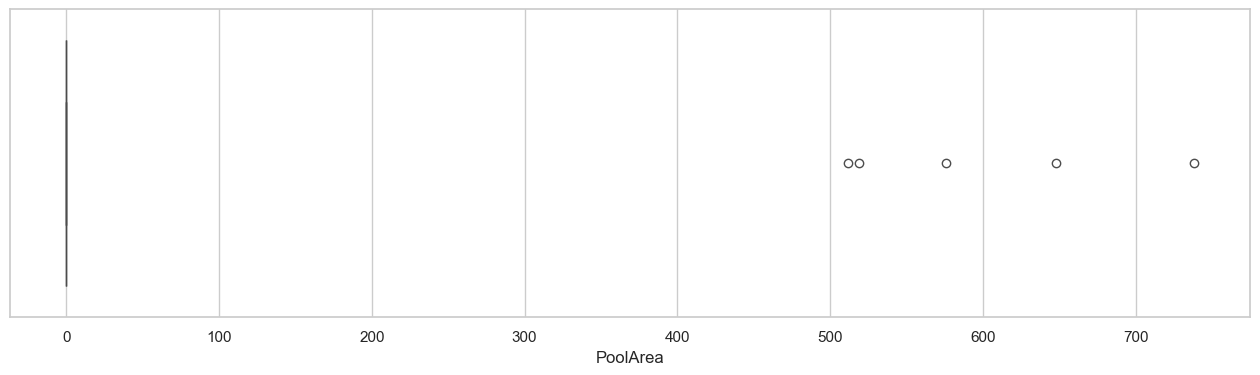

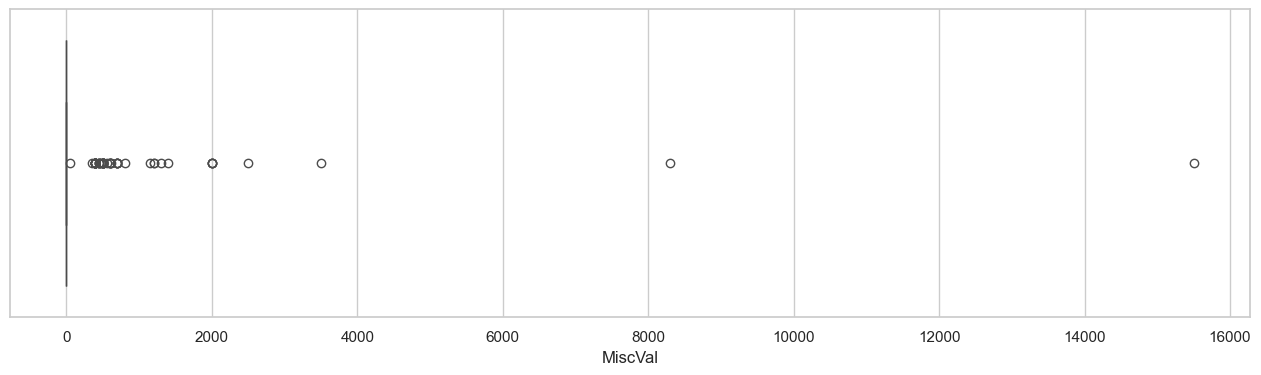

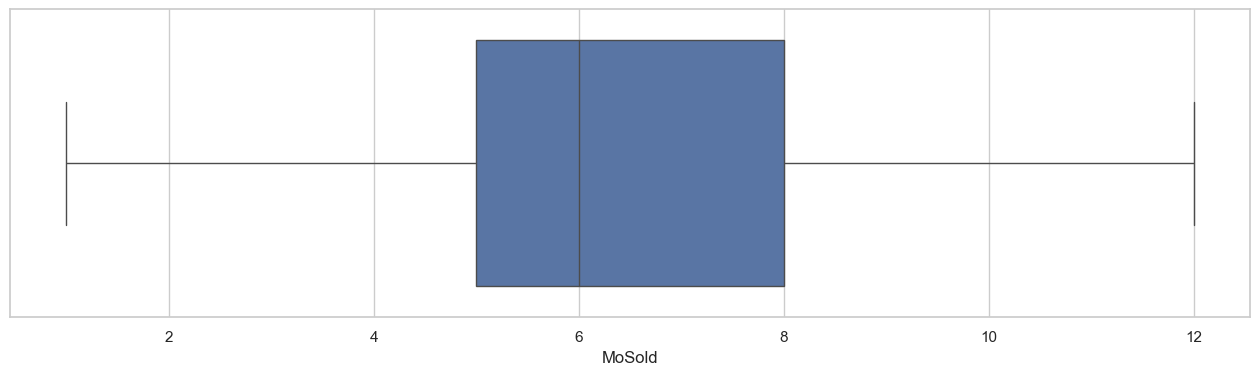

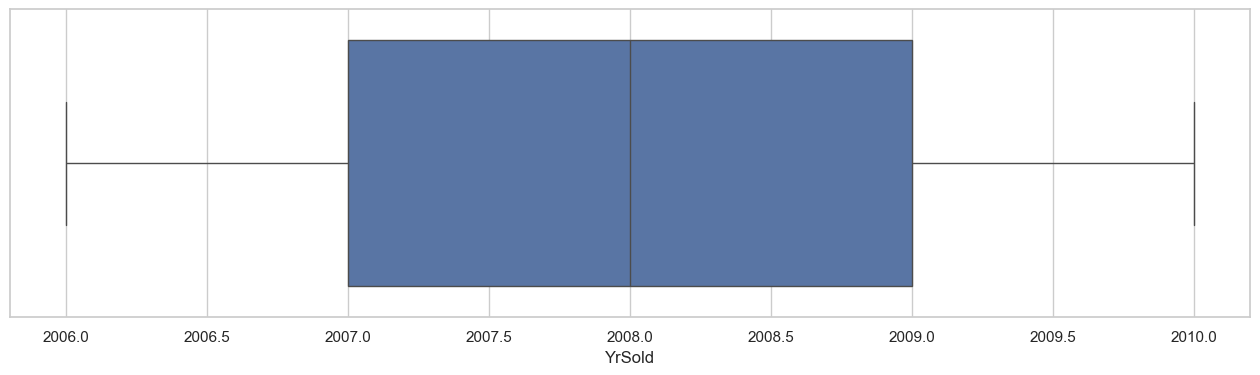

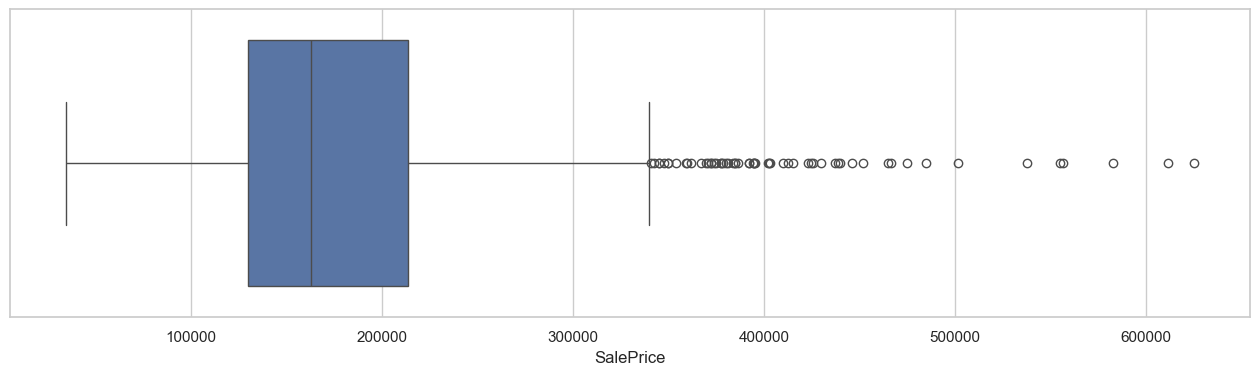

In [7]:
numerical_df = df_train.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(['Id'], axis=1)

for col in numerical_df:
    plt.figure(figsize = (16,4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=numerical_df[col], orient ='h')
    plt.xlabel(col)
    plt.show

### Missing value

In [8]:
### Kiem tra missing value
total_missing = pd.DataFrame(df_train.isnull().sum(), columns=['Total Missing'])
total_missing = total_missing[total_missing['Total Missing'] > 0]
total_missing.sort_values(by='Total Missing', ascending=False)

,Total Missing
PoolQC,1451
MiscFeature,1402
Alley,1365
Fence,1176
MasVnrType,871
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


### Target features distribution

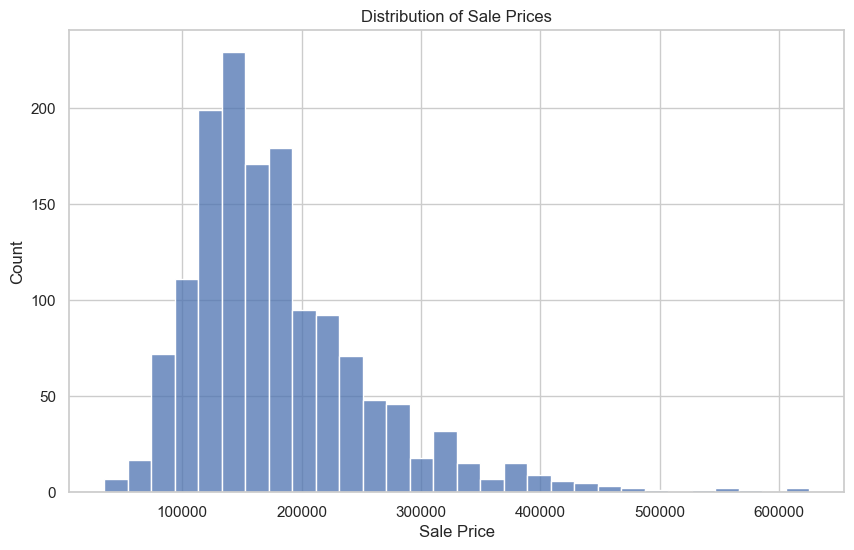

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='SalePrice', bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

Ta thấy SalePrice bị lệch phải (right-schewed) -> nên cần log-transform

SalePrice sau khi log-transform

### Correlation Heatmap

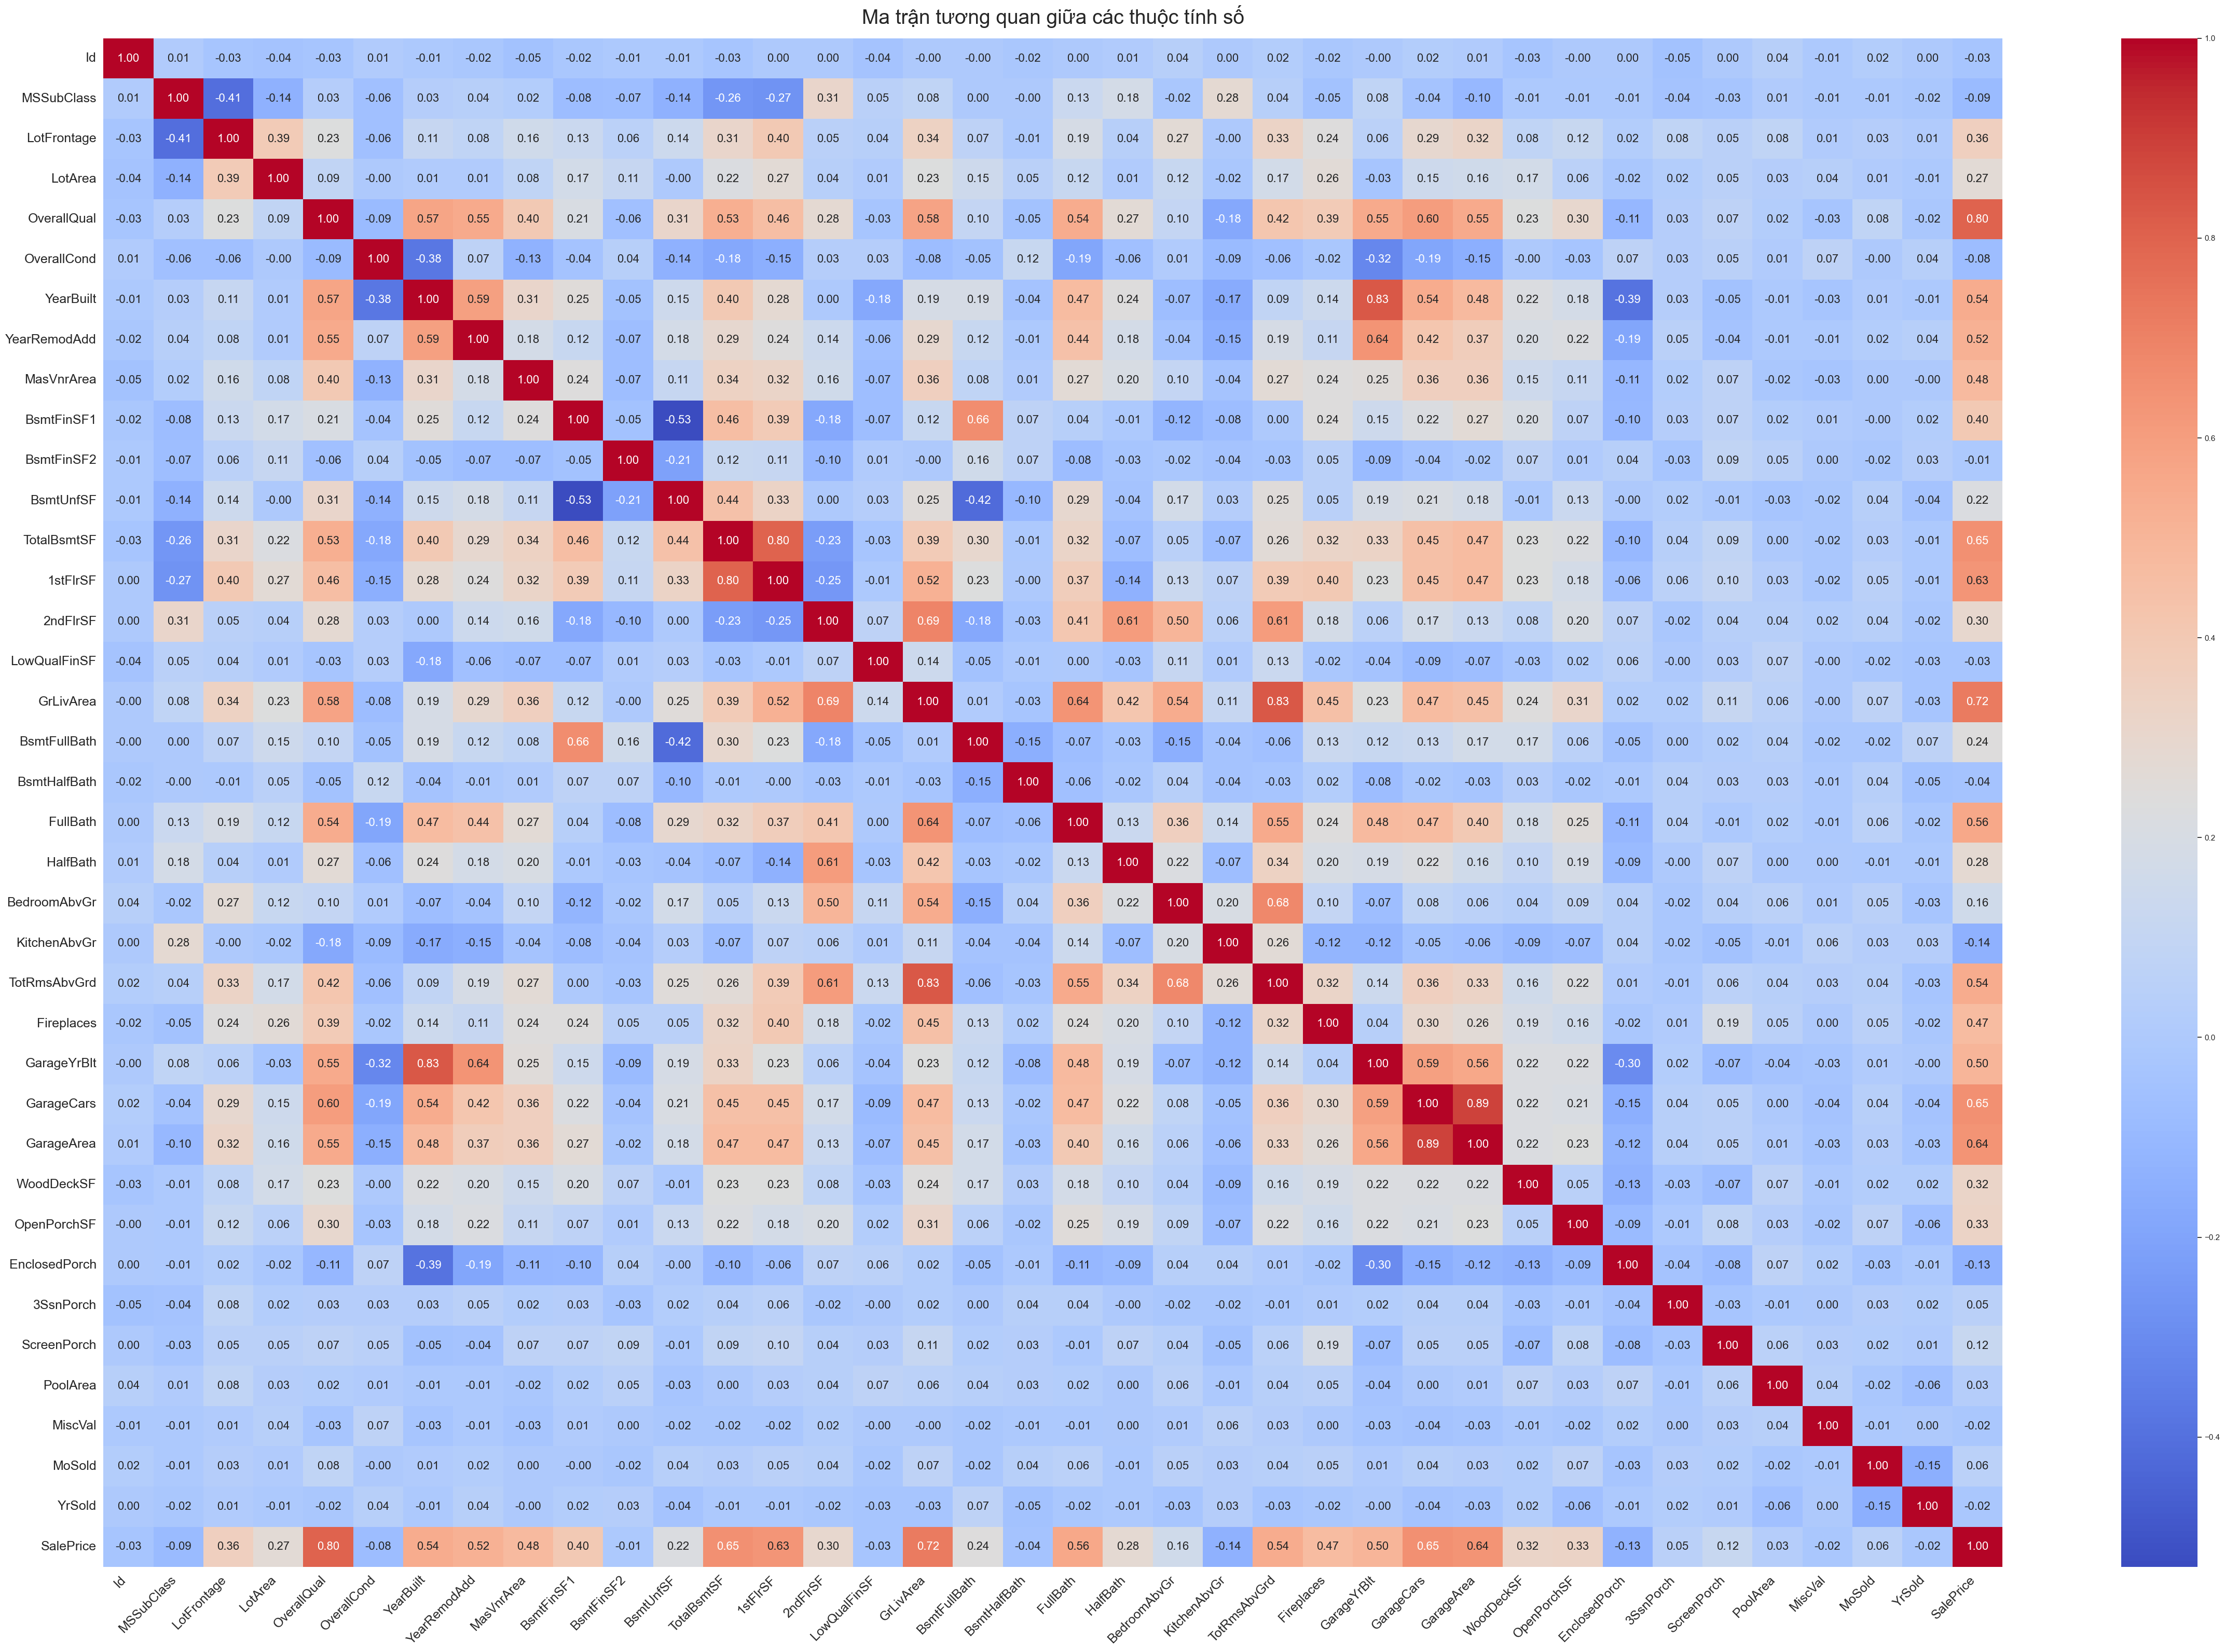

In [10]:


numerical_df = df_train.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr().round(2)

plt.figure(figsize=(48, 32))
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='0.2f',
    annot_kws={"size": 16}
)

# ✅ Tăng kích thước chữ cho tên thuộc tính
plt.xticks(fontsize=18, rotation=45, ha='right')  # Xoay cho dễ đọc
plt.yticks(fontsize=18)

plt.title("Ma trận tương quan giữa các thuộc tính số", fontsize=28, pad=20)
plt.tight_layout()
plt.show()


Ta sẽ bắt đầu tìm hiểu các đặc trưng có cor > 0.6 với SalePrice 
và các đặc trung có tương quan mạnh với nhau > 0.7
-   0.89 garage car , garage area
-   0.83 lot

### Preprocessing

### Merge dataset
ta sẽ gộp 2 datasets train và test trong preprocessing để xử lý features

In [11]:
df = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)

df.shape

(2915, 81)

### Fill missing value sau khi merge